In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk6 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-12
    (res, sol, first_deriv, error_samplings, ratios, monitor) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, error_samplings) = rk_error_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    
    plt.figure()
    end_of_steps = [r[0] for r in ratios]
    ratios_at_end_of_steps = [r[1] for r in ratios]
    plt.plot(end_of_steps, ratios_at_end_of_steps)
    plt.axhline(y=1, color="red")
    plt.xlabel("t")
    plt.ylabel("ratio")
    # plt.title(f"error_estimate/exact_error at end of steps for tol={tol}")
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

    # # shape of errors - graphs
    # plt.figure()
    # for (x_i, x_i_plus_1, hb) in error_samplings:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     errors = []
    #     for i, pt in enumerate(pts_to_sample):
    #         y = solution([pt])[0]
    #         hb_eval = hb.eval(pt)
    #         error = abs(hb_eval - y)
    #         errors.append( error )

    #         # # print the error at the extremities
    #         # if i == 0:
    #         #     interpolation_error = hb_eval - hb.y_i
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #         # if i == len(pts_to_sample) - 1:
    #         #     interpolation_error = hb_eval - hb.y_i_plus_1
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #     maximum_error = max(errors)
    #     scaled_errors = [error / (maximum_error) for error in errors]

    #     # str_x_i = "{:.3f}".format(x_i)
    #     # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]
    #     plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    # plt.title("plot of shape of errors")
    # plt.xlabel("step scaled between 0 and 1")
    # plt.ylabel('scaled error')
    # # plt.legend()
    # plt.show()

    # # ====================================== figure of satisfying global defect
    # actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    # hb_prime_evals = [first_deriv(x) for x in t_eval]
    # plt.figure()
    # plt.plot(t_eval, actual_f_evals)
    # plt.plot(t_eval, hb_prime_evals)
    # plt.title(f"first derivative for tol={tol}")
    # plt.show()

    # defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    # plt.figure()
    # plt.plot(t_eval, defects)
    # plt.title(f"global defect for tol={tol}")
    # plt.show()
    
    # # ====================================== end figure of satisfying global defect

    # # ====================================== figure of defect shape

    # minimum_step_size = 0.01
    # defects_small_steps = []
    # plt.figure()
    # for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     defects = []
    #     for pt in pts_to_sample:
    #         y = solution([pt])[0]
    #         f_eval  = model(pt, y)[0]
    #         hb_prime_eval = hb.prime(pt)
    #         defects.append( abs(hb_prime_eval - f_eval) )
    #     maximum_defect = max(defects)
    #     # minimum_defect = min(defects)
    #     # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
    #     plot_vals = [ defect/ maximum_defect for defect in defects]
    #     #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]

    #     if (x_i_plus_1 - x_i < minimum_step_size):
    #         defects_small_steps.append([x_axis, plot_vals])
    #         continue
    #     plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    # plt.title("plot of defects")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # # plt.legend()
    # plt.show()
    # # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in defects_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of defects on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.show()

tolerance= 1e-12
Monitor8
alpha values [0.5000000000000006, 1.0, 0.9999999999999989, 1.0000000000000022, 0.9999999999999978, 0.5, 2.0, 7.999999999999994, 1.0000000000000044, 0.4999999999999978, 2.000000000000009]
beta values [0.4999999999999999, 1.0000000000000002, 1.9999999999999978, 0.24999999999999994, 0.1250000000000001, 2.0000000000000013, 1.0, 1.000000000000001, 0.9999999999999978, 2.0000000000000044, 1.0000000000000022, 2.0, 0.5, 1.9999999999999956, 2.000000000000009, 0.4999999999999978, 0.9999999999999956]
n_steps 158
n_successful_steps 109


Monitor6
alpha values [0.9999999999999998, 0.5000000000000006, 2.0000000000000004, 0.4999999999999997, 4.000000000000001, 1.0, 0.9999999999999989, 7.999999999999994, 1.0000000000000022, 0.4999999999999989, 0.9999999999999978, 0.5, 2.0, 1.0000000000000044, 0.4999999999999978, 2.000000000000009, 0.5000000000000011]
beta values []
n_steps 0
n_successful_steps 0

integration complete


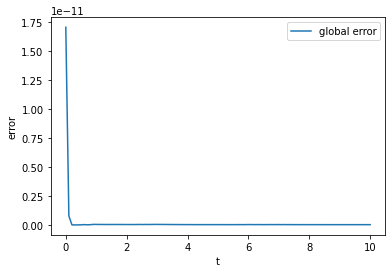

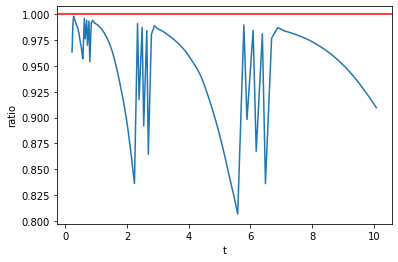

0.0
0.0
0.0
6.661338147750939e-16
1.6653345369377348e-15
1.9984014443252818e-15
4.551914400963142e-15
7.438494264988549e-15
9.43689570931383e-15
8.992806499463768e-15
9.769962616701378e-15
1.1657341758564144e-14
1.3877787807814457e-14
1.5654144647214707e-14
1.5765166949677223e-14
1.6986412276764895e-14
1.8096635301390052e-14
1.7208456881689926e-14
1.8096635301390052e-14
1.8207657603852567e-14
1.765254609153999e-14
1.765254609153999e-14
2.120525977034049e-14
2.2093438190040615e-14
2.5646151868841116e-14
2.731148640577885e-14
3.042011087472929e-14
3.2307490016592055e-14
3.441691376337985e-14
3.552713678800501e-14
3.608224830031759e-14
3.752553823233029e-14
3.8968828164342995e-14
3.952393967665557e-14
3.9745984281580604e-14
4.085620730620576e-14
4.118927421359331e-14
4.1744385725905886e-14
4.218847493575595e-14
4.463096558993129e-14
4.418687638008123e-14
4.39648317751562e-14
4.463096558993129e-14
4.418687638008123e-14
4.3298697960381105e-14
4.340972026284362e-14
4.296563105299356e-14
4.28

In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-12
Monitor8
alpha values [0.5, 1.0, 2.0, 1.0000000000000044, 0.4999999999999978, 2.000000000000009, 7.999999999999994]
beta values [0.4999999999999999, 1.0000000000000002, 0.24999999999999994, 0.1250000000000001, 1.0, 2.0, 1.9999999999999978, 0.5, 0.9999999999999956, 2.000000000000009, 0.4999999999999978]
n_steps 211
n_successful_steps 152


Monitor6
alpha values [0.9999999999999998, 1.0, 2.0000000000000004, 0.5, 4.000000000000001, 0.5000000000000006, 2.0, 7.999999999999994, 1.0000000000000044, 0.4999999999999978, 2.000000000000009]
beta values []
n_steps 0
n_successful_steps 0

integration complete


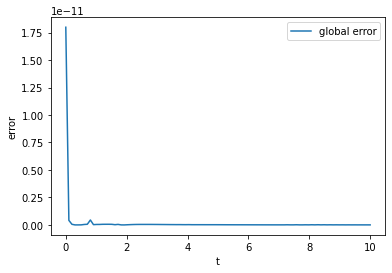

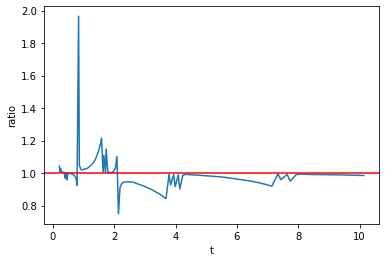

0.0
0.0
0.0
6.661338147750939e-16
1.1102230246251565e-15
4.551914400963142e-15
8.659739592076221e-15
1.0436096431476471e-14
1.1546319456101628e-14
1.4988010832439613e-14
2.0539125955565396e-14
2.142730437526552e-14
2.475797344914099e-14
2.609024107869118e-14
2.986499936241671e-14
3.042011087472929e-14
3.164135620181696e-14
3.47499806707674e-14
3.530509218307998e-14
4.18554080283684e-14
4.651834473179406e-14
4.6074255521943996e-14
5.007105841059456e-14
5.306866057708248e-14
5.1514348342607263e-14
5.051514762044462e-14
5.229150445984487e-14
5.340172748447003e-14
5.839773109528323e-14
2.1538326677728037e-14
2.19824158875781e-14
2.098321516541546e-14
2.4202861936828413e-14
2.7755575615628914e-14
3.552713678800501e-14
4.0967229608668276e-14
4.4020342926387457e-14
4.2743586448068527e-14
4.6906922790412864e-14
4.75175454539567e-14
4.746203430272544e-14
5.345723863570129e-14
5.6343818499726694e-14
5.800915303666443e-14
5.978550987606468e-14
5.950795411990839e-14
5.92303983637521e-14
5.85642645

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-12
Monitor8
alpha values [0.9999999999999998, 1.0, 0.9999999999999989, 0.5000000000000003, 1.0000000000000044]
beta values [0.9999999999999956, 1.0000000000000002, 2.0, 1.000000000000001, 1.999999999999999, 1.0]
n_steps 53
n_successful_steps 50


Monitor6
alpha values [0.9999999999999998, 0.5000000000000003, 0.9999999999999989, 1.0, 0.5, 1.0000000000000044]
beta values []
n_steps 0
n_successful_steps 0

integration complete


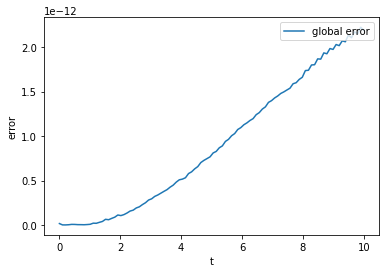

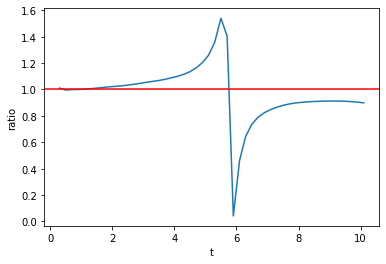

0.0
0.0
0.0
2.220446049250313e-15
5.773159728050814e-15
3.1086244689504383e-15
4.6629367034256575e-15
2.020605904817785e-14
2.930988785010413e-14
6.350475700855895e-14
7.394085344003543e-14
1.1191048088221578e-13
1.1590728377086634e-13
1.5587531265737198e-13
1.9029222642075183e-13
2.282618538629322e-13
2.793321129956894e-13
3.19300141882195e-13
3.5482727867020003e-13
3.934630399271555e-13
4.440892098500626e-13
5.067057884389214e-13
5.231370892033738e-13
5.928590951498336e-13
6.501466032204917e-13
7.220890552162018e-13
7.549516567451064e-13
8.180123245438153e-13
8.784084570834239e-13
9.539036227579345e-13
1.014743844507393e-12
1.0840217612440028e-12
1.13420384195706e-12
1.1786127629420662e-12
1.248778858098376e-12
1.312727704316785e-12
1.3908874052503961e-12
1.4388490399142029e-12
1.4850343177386094e-12
1.5223378113660146e-12
1.596056620201125e-12
1.6493473253831326e-12
1.7497114868092467e-12
1.8038903704109543e-12
1.8705037518884637e-12
1.942446203884174e-12
1.992184195387381e-12
2.033

In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-12
Monitor8
alpha values [64.00000000000023, 1.0, 0.4999999999999978, 0.5, 1.0000000000000044, 0.9999999999999822, 2.0, 1.000000000000071, 0.4999999999999645, 2.000000000000142, 0.9999999999998579, 1.000000000000142]
beta values [0.4999999999999999, 1.0000000000000002, 0.06250000000000006, 0.24999999999999994, 0.1250000000000001, 0.03124999999999989, 0.015624999999999944, 1.0, 2.0, 2.000000000000009, 1.9999999999999956, 1.0000000000000178, 0.5, 2.000000000000142, 1.000000000000142, 0.4999999999999645, 0.9999999999999956, 0.9999999999998579, 0.999999999999929]
n_steps 1941
n_successful_steps 1565


Monitor6
alpha values [0.9999999999999998, 1.0, 2.0000000000000004, 0.5, 4.000000000000001, 0.4999999999999978, 0.5000000000000011, 7.999999999999994, 1.0000000000000044, 2.0, 1.000000000000071, 2.000000000000142, 1.000000000000142, 15.999999999999988, 32.000000000000114, 0.4999999999999645, 64.00000000000023, 0.9999999999998579, 0.9999999999999822]
beta values []
n_steps 0
n_su

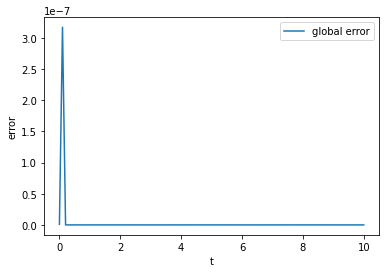

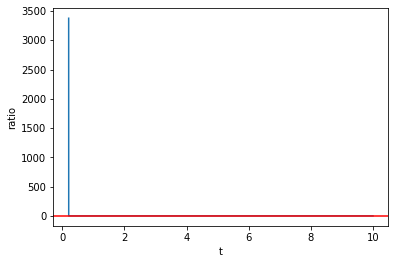

0.0
0.0
0.0
1.3600232051658168e-15
2.942091015256665e-15
1.2323475573339238e-14
3.1763203178769572e-12
5.008576886567084e-12
6.065453694859002e-12
6.738914981596622e-12
7.204847829456185e-12
7.554290526456953e-12
7.868844464908875e-12
8.117367888971216e-12
8.365030890189473e-12
8.595013589740574e-12
8.818223928841462e-12
9.049705429475807e-12
9.253875443704374e-12
9.470646489262435e-12
9.671929923626976e-12
9.881206963768818e-12
1.0095813074428861e-11
1.0321021814974074e-11
1.0552170248701032e-11
1.0746181722254278e-11
1.0944967154813412e-11
1.1157075263668048e-11
1.1368295194102984e-11
1.1588729975642309e-11
1.1782130826532011e-11
1.1986522885365503e-11
1.2198075882707826e-11
1.241667879625652e-11
1.2642331626011583e-11
1.2870093879513433e-11
1.3078205185479419e-11
1.3264223053255364e-11
1.3482215344140513e-11
1.367800317453316e-11
1.3888390437699627e-11
1.407257643748494e-11
1.4287349081598677e-11
1.4486467581065199e-11
1.4700907158271548e-11
1.4890699784331218e-11
1.5126233599005445

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-12
Monitor8
alpha values [0.9999999999999822, 1.0, 2.0, 1.0000000000000044, 0.5000000000000089, 0.5, 1.9999999999999645, 1.0000000000000355, 0.49999999999998224, 2.000000000000142, 0.4999999999999645, 1.000000000000071, 0.9999999999997158, 0.5000000000001421, 1.9999999999994316, 15.999999999999988]
beta values [0.4999999999999999, 1.0000000000000002, 0.06250000000000006, 0.24999999999999994, 0.1250000000000001, 1.0, 2.0, 1.9999999999999956, 0.9999999999999956, 2.000000000000009, 0.5, 2.0000000000000178, 1.0000000000000178, 1.9999999999999645, 2.000000000000071, 2.000000000000142, 0.5000000000000089, 1.0000000000002842, 1.9999999999994316, 0.9999999999999645, 0.4999999999999645, 0.5000000000001421, 0.999999999999929, 1.999999999999929]
n_steps 2517
n_successful_steps 1924


Monitor6
alpha values [0.9999999999999998, 1.0, 2.0000000000000004, 0.5, 4.000000000000001, 0.5000000000000011, 1.0000000000000044, 7.999999999999994, 0.4999999999999978, 2.0, 1.9999999999999645, 1.0000

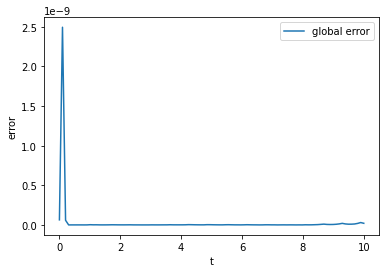

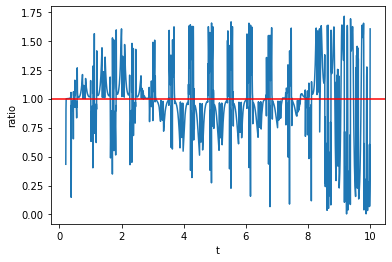

0.0
0.0
0.0
1.7763568394002505e-15
4.440892098500626e-15
3.552713678800501e-15
3.9968028886505635e-15
4.440892098500626e-15
7.549516567451064e-15
1.0658141036401503e-14
1.4210854715202004e-14
1.687538997430238e-14
1.9539925233402755e-14
2.220446049250313e-14
2.7533531010703882e-14
2.5757174171303632e-14
2.842170943040401e-14
3.375077994860476e-14
4.1300296516055823e-14
4.263256414560601e-14
5.3290705182007514e-14
5.573319583618286e-14
6.017408793468348e-14
6.94999613415348e-14
8.215650382226158e-14
9.658940314238862e-14
1.1146639167236572e-13
1.2989609388114332e-13
1.396660564978447e-13
1.5165646516379638e-13
1.6919798895287386e-13
1.9118040484045196e-13
1.9384494009955233e-13
1.9673151996357774e-13
2.0405899192610377e-13
2.1116441928370477e-13
2.1960211427085596e-13
2.2426505097428162e-13
2.291500322826323e-13
2.3381296898605797e-13
2.389199948993337e-13
2.424727085781342e-13
2.462474668618597e-13
2.544631172440859e-13
2.644551244657123e-13
2.7422508708241367e-13
2.773337115513641e-13

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-12
Monitor8
alpha values [0.5, 1.0, 0.9999999999999978, 1.0000000000000022, 2.0, 2.000000000000009, 0.4999999999999978, 7.999999999999994, 1.0000000000000044]
beta values [0.4999999999999999, 1.0000000000000002, 0.24999999999999994, 0.1250000000000001, 1.0, 2.0, 0.9999999999999978, 1.0000000000000022, 0.5, 0.4999999999999978, 2.000000000000009, 0.9999999999999956]
n_steps 175
n_successful_steps 126


Monitor6
alpha values [0.9999999999999998, 1.0, 2.0000000000000004, 0.5, 4.000000000000001, 1.0000000000000022, 0.9999999999999978, 7.999999999999994, 2.0, 2.000000000000009, 0.4999999999999978, 1.0000000000000044]
beta values []
n_steps 0
n_successful_steps 0

integration complete


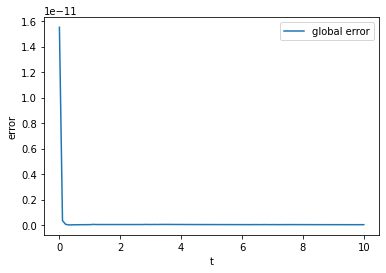

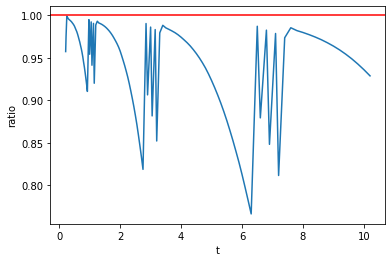

0.0
0.0
0.0
1.2212453270876722e-15
1.9984014443252818e-15
4.440892098500626e-15
7.105427357601002e-15
1.099120794378905e-14
1.3766765505351941e-14
1.4988010832439613e-14
1.6764367671839864e-14
1.7208456881689926e-14
1.9539925233402755e-14
1.9872992140790302e-14
2.0650148258027912e-14
2.298161660974074e-14
2.3425705819590803e-14
2.4091839634365897e-14
2.4424906541753444e-14
2.5979218776228663e-14
2.6978419498391304e-14
2.7200464103316335e-14
2.7644553313166398e-14
2.853273173286652e-14
2.786659791809143e-14
2.8976820942716586e-14
3.019806626980426e-14
2.986499936241671e-14
2.986499936241671e-14
3.0753177782116836e-14
3.108624468950438e-14
3.108624468950438e-14
3.186340080674199e-14
3.2307490016592055e-14
3.247402347028583e-14
3.2807090377673376e-14
3.2585045772748344e-14
3.524958103184872e-14
3.5860203695392556e-14
3.5083047578154947e-14
3.602673714908633e-14
3.6137759451548845e-14
3.597122599785507e-14
3.68594044175552e-14
3.7414515929867775e-14
3.735900477863652e-14
3.858025010572419e

In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-12
Monitor8
alpha values [0.9999999999999989, 1.0, 2.0000000000000004, 2.0, 0.5000000000000006, 1.0000000000000044, 0.5, 0.9999999999999822]
beta values [0.4999999999999999, 1.0000000000000002, 1.9999999999999978, 1.0, 1.000000000000001, 0.5, 2.0, 0.9999999999999956, 2.000000000000009, 1.0000000000000178, 1.9999999999999645]
n_steps 236
n_successful_steps 189


Monitor6
alpha values [0.9999999999999998, 1.0, 2.0000000000000004, 0.9999999999999989, 0.5000000000000006, 2.0, 0.5, 1.0000000000000044, 0.4999999999999978, 0.9999999999999822, 0.5000000000000089]
beta values []
n_steps 0
n_successful_steps 0

integration complete


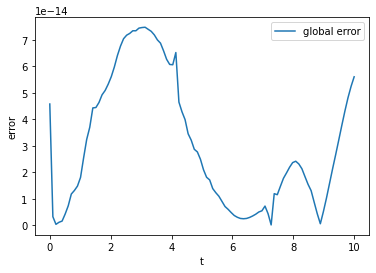

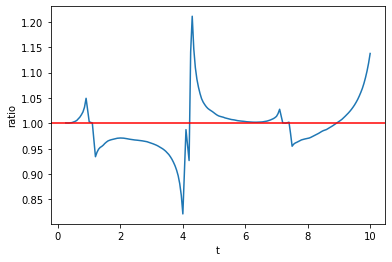

0.0
0.0
0.0
3.3306690738754696e-16
9.992007221626409e-16
9.992007221626409e-16
1.5543122344752192e-15
2.9976021664879227e-15
4.3298697960381105e-15
5.88418203051333e-15
7.438494264988549e-15
9.2148511043888e-15
1.199040866595169e-14
1.1546319456101628e-14
1.3100631690576847e-14
1.4432899320127035e-14
1.4988010832439613e-14
1.9317880628477724e-14
2.5757174171303632e-14
3.0142555118573e-14
3.275157922644212e-14
3.5638159090467525e-14
3.7164715749327115e-14
4.1799896877137144e-14
4.5102810375396984e-14
4.476974346800944e-14
4.451994328746878e-14
4.641426132323545e-14
4.6570386436073363e-14
4.8655524054197485e-14
4.975186929101483e-14
5.134781488891349e-14
5.115352585960409e-14
5.292988269900434e-14
5.384581669432009e-14
5.517808432387028e-14
5.678790770957676e-14
5.850875339774575e-14
6.050715484207103e-14
6.300515664747763e-14
6.483702463810914e-14
6.7390537594747e-14
6.838973831690964e-14
7.005507285384738e-14
7.149836278586008e-14
7.216449660063518e-14
7.216449660063518e-14
7.349676423

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-12
Monitor8
alpha values [0.5000000000000006, 1.0, 0.9999999999999989, 1.0000000000000022, 0.9999999999999978, 1.0000000000000044, 0.4999999999999978, 7.999999999999994, 2.000000000000009, 0.5]
beta values [0.4999999999999999, 1.0000000000000002, 1.9999999999999978, 0.24999999999999994, 0.1250000000000001, 2.0000000000000013, 1.0, 1.000000000000001, 0.9999999999999978, 1.0000000000000022, 2.0, 1.9999999999999956, 2.000000000000009, 0.4999999999999978, 0.9999999999999956]
n_steps 180
n_successful_steps 123


Monitor6
alpha values [0.9999999999999998, 0.5000000000000006, 2.0000000000000004, 0.4999999999999997, 4.000000000000001, 1.0, 0.9999999999999989, 7.999999999999994, 1.0000000000000022, 0.9999999999999978, 0.5, 1.0000000000000044, 0.4999999999999978, 2.000000000000009, 0.5000000000000011]
beta values []
n_steps 0
n_successful_steps 0

integration complete


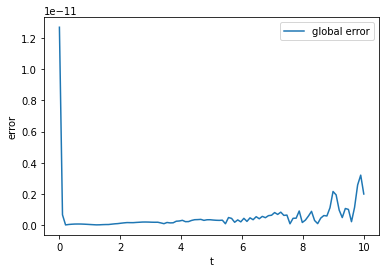

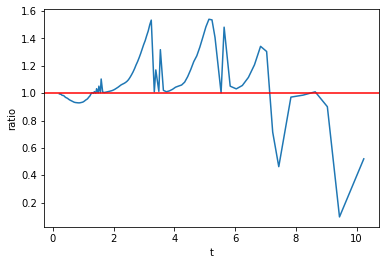

0.0
0.0
0.0
4.3298697960381105e-15
1.887379141862766e-14
2.4868995751603507e-14
3.319566843629218e-14
2.886579864025407e-14
2.942091015256665e-14
3.8746783559417963e-14
5.084821452783217e-14
4.8960835385969403e-14
5.00155472593633e-14
5.190292640122607e-14
5.6066262743570405e-14
6.0285110237146e-14
5.911937606128959e-14
6.056266599330229e-14
6.056266599330229e-14
6.011857678345223e-14
6.072919944699606e-14
6.034062138837726e-14
6.011857678345223e-14
5.756506382681437e-14
5.5344617777564054e-14
5.334621633323877e-14
5.112577028398846e-14
4.907185768843192e-14
4.674038933671909e-14
4.440892098500626e-14
4.118927421359331e-14
3.835820550079916e-14
3.5860203695392556e-14
3.319566843629218e-14
3.0253577421035516e-14
2.6367796834847468e-14
2.3092638912203256e-14
1.9872992140790302e-14
1.7708057242771247e-14
1.587618925213974e-14
1.2434497875801753e-14
8.43769498715119e-15
6.716849298982197e-15
5.162537064506978e-15
2.275957200481571e-15
5.440092820663267e-15
7.216449660063518e-15
9.436895709

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)